In [10]:
%cd ~/Research/nonasymptotic-mp
from nonasymptotic.envs import GrayCodeWalls, NarrowPassage
from nonasymptotic.prm import SimpleRadiusPRM, SimpleFullConnRadiusPRM, SimpleNearestNeighborRadiusPRM

import matplotlib.pyplot as plt
import numpy as np

/home/seiji/Research/nonasymptotic-mp


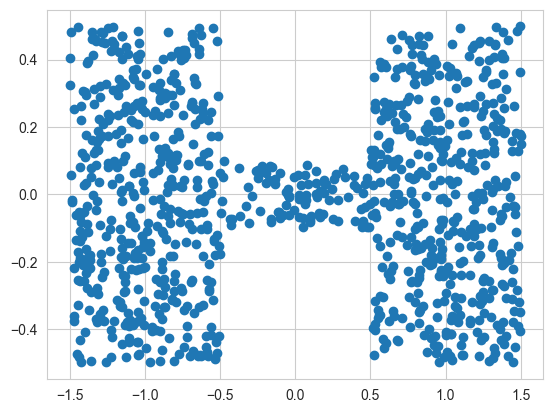

In [2]:
# visualizing 2D env
# env_2d = GrayCodeWalls(2, 2, 0.2)
env_2d = NarrowPassage(2, 0.1, seed=1999)
points = np.array([env_2d.sample_from_env() for _ in range(1000)])
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(points[:, 0], points[:, 1])
plt.show()


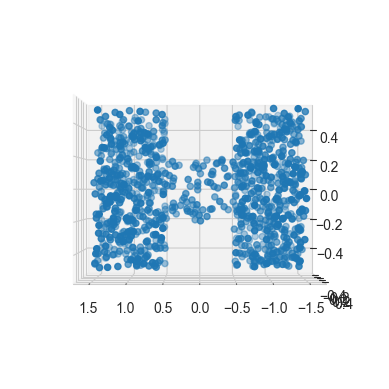

In [3]:
# visualizing 3D env
env_3d = NarrowPassage(3, 0.2, seed=1999)
points = np.array([env_3d.sample_from_env() for _ in range(1000)])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=00, azim=90)

ax.scatter(points[:, 0], points[:, 1], points[:, 2])
plt.show()


/home/seiji/Research/nonasymptotic-mp/nonasymptotic/util.py:47: RuntimeWarning: divide by zero encountered in divide
  intersect_coeff1 = intersect_coeff_unnormed1 / cross_dir
/home/seiji/Research/nonasymptotic-mp/nonasymptotic/util.py:48: RuntimeWarning: invalid value encountered in divide
  intersect_coeff2 = intersect_coeff_unnormed2 / cross_dir


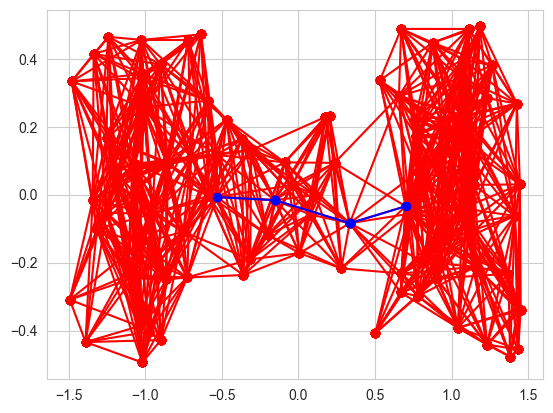

N nodes: 100
N edges: 1041


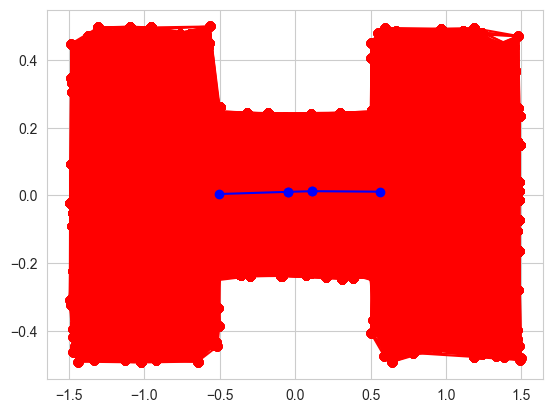

N nodes: 1000
N edges: 102886


In [4]:
# visualizing a small PRM built on 2d env
start = np.array([-1.0, 0.0])
goal = np.array([1.0, 0.0])


prm_env_2d = NarrowPassage(2, 0.25, seed=1816595736)
prm = SimpleFullConnRadiusPRM(1.0, prm_env_2d.is_motion_valid, prm_env_2d.sample_from_env, seed=1816595736)

prm.grow_to_n_samples(100)
prm.set_connection_radius(0.50)
_, path = prm.query_best_solution(start, goal)


plt.figure()
for u, v in prm.prm_graph.iterEdges():
    coords_u = prm.prm_samples[u]
    coords_v = prm.prm_samples[v]
    
    plt.plot([coords_u[0], coords_v[0]], [coords_u[1], coords_v[1]], 'ro-')
for i in range(len(path) - 1):
    u, v = path[i], path[i+1]
    
    plt.plot([u[0], v[0]], [u[1], v[1]], 'bo-')
plt.show()

# some other computations to help other visual tests later on:
print('N nodes: %i' % prm.num_vertices())
print('N edges: %i' % prm.num_edges())


prm.grow_to_n_samples(1000)
_, path = prm.query_best_solution(start, goal)

plt.figure()
for u, v in prm.prm_graph.iterEdges():
    coords_u = prm.prm_samples[u]
    coords_v = prm.prm_samples[v]

    plt.plot([coords_u[0], coords_v[0]], [coords_u[1], coords_v[1]], 'ro-')
for i in range(len(path) - 1):
    u, v = path[i], path[i+1]
    plt.plot([u[0], v[0]], [u[1], v[1]], 'bo-')
    
    
plt.show()

# some other computations to help other visual tests later on:
print('N nodes: %i' % prm.num_vertices())
print('N edges: %i' % prm.num_edges())

Generating control...
Initializing...
iteration: 1 recall: 1 accuracy: 0 cost: 35.7576 M: 30 delta: 1 time: 0.0151848 one-recall: 1 one-ratio: 1
Saving to text file; you won't be able to load text file.


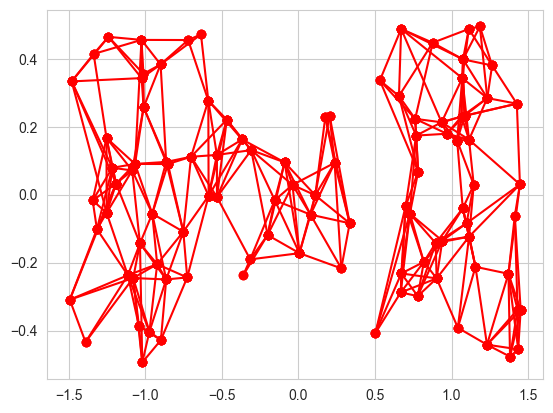

Generating control...
Initializing...
iteration: 1 recall: 0.97375 accuracy: 0.0412959 cost: 3.54354 M: 30 delta: 1 time: 0.0121376 one-recall: 0.98 one-ratio: 1.04215
iteration: 2 recall: 1 accuracy: 0 cost: 4.67303 M: 30 delta: 0.033 time: 0.0570004 one-recall: 1 one-ratio: 1
Saving to text file; you won't be able to load text file.


[]
N nodes: 100
N edges: 331


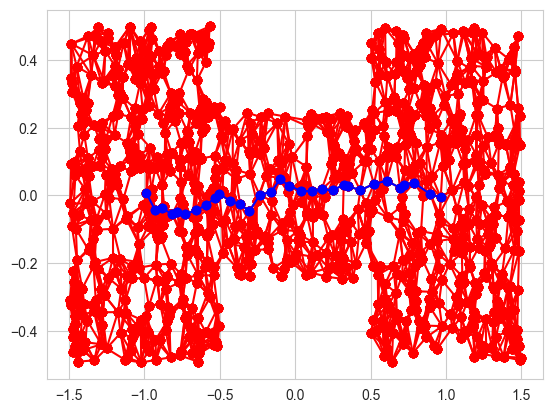

In [5]:
# visualizing a small PRM built on 2d env
start = np.array([-1.0, 0.0])
goal = np.array([1.0, 0.0])


prm_env_2d = NarrowPassage(2, 0.25, seed=1816595736)
prm = SimpleNearestNeighborRadiusPRM(16, prm_env_2d.is_motion_valid, prm_env_2d.sample_from_env, prm_env_2d.distance_to_path, seed=1816595736, truncate_to_eff_rad=False)

prm.grow_to_n_samples(100)
prm.set_nearest_neighbors(8)
_, path = prm.query_best_solution(start, goal)


plt.figure()
for u, v in prm.prm_graph.iterEdges():
    coords_u = prm.prm_samples[u]
    coords_v = prm.prm_samples[v]
    
    plt.plot([coords_u[0], coords_v[0]], [coords_u[1], coords_v[1]], 'ro-')
for i in range(len(path) - 1):
    u, v = path[i], path[i+1]
    plt.plot([u[0], v[0]], [u[1], v[1]], 'bo-')
    
plt.show()
print(path)

# some other computations to help other visual tests later on:
print('N nodes: %i' % prm.num_vertices())
print('N edges: %i' % prm.num_edges())


prm.grow_to_n_samples(1000)
_, path = prm.query_best_solution(start, goal)

plt.figure()
for u, v in prm.prm_graph.iterEdges():
    coords_u = prm.prm_samples[u]
    coords_v = prm.prm_samples[v]

    plt.plot([coords_u[0], coords_v[0]], [coords_u[1], coords_v[1]], 'ro-')
for i in range(len(path) - 1):
    u, v = path[i], path[i+1]
    plt.plot([u[0], v[0]], [u[1], v[1]], 'bo-')
    
    
plt.show()



Generating control...
Initializing...
iteration: 1 recall: 1 accuracy: 0 cost: 35.7576 M: 30 delta: 1 time: 0.0136024 one-recall: 1 one-ratio: 1
Saving to text file; you won't be able to load text file.


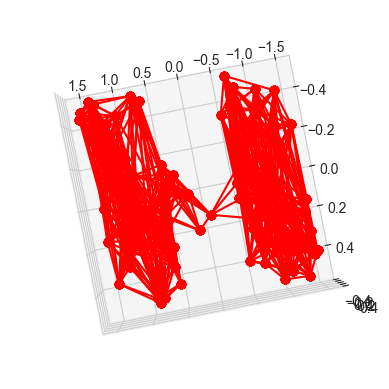

N nodes: 100
N edges: 946


In [6]:
# visualizing a small PRM built on 3d env
prm_env_3d = NarrowPassage(3, 0.1, seed=1999)
prm = SimpleRadiusPRM(0.05, env_3d.is_motion_valid, env_3d.sample_from_env, env_3d.sample_from_env, max_k_connection_neighbors=32, seed=1999)
prm.grow_to_n_samples(100)

plt.figure()
ax = plt.subplot(projection='3d')
for u, v in prm.prm_graph.iterEdges():
    coords_u = prm.prm_samples[u]
    coords_v = prm.prm_samples[v]

    ax.plot([coords_u[0], coords_v[0]], 
            [coords_u[1], coords_v[1]], 
            [coords_u[2], coords_v[2]], 'ro-')

ax.view_init(elev=90, azim=80)
plt.show()

# some other computations to help other visual tests later on:
print('N nodes: %i' % prm.num_vertices())
print('N edges: %i' % prm.num_edges())



Generating control...
Initializing...
iteration: 1 recall: 1 accuracy: 0 cost: 70.7812 M: 30 delta: 1 time: 0.0469868 one-recall: 1 one-ratio: 1
Saving to text file; you won't be able to load text file.


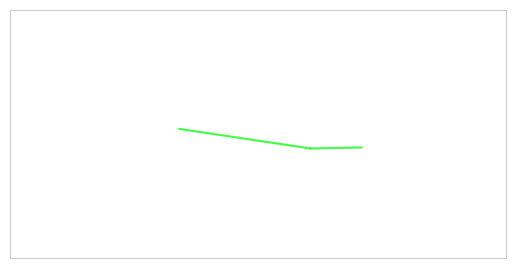

In [27]:
# building a PRM 
import matplotlib.animation as animation
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128


def animate_knn_prm(_prm, _sol, node_filter, node_batches=5, edge_batches=5, interval=50, animation_embed_limit=None):
    if animation_embed_limit is not None:
        import matplotlib
        matplotlib.rcParams['animation.embed_limit'] = animation_embed_limit
  
    fig, ax = plt.subplots()
       
    ax.set_xlim([-2.0, 2.0])
    ax.set_ylim([-1.0, 1.0])
    ax.set_aspect('equal', adjustable='box')
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

    
    # first, generate the frame information.
    n_verts = _prm.num_vertices()
    k = _prm.k_neighbors
   
    sampling_frames = []
    for i in range(int(n_verts / node_batches) + 1):
        sampling_frames.append(
            ("sampling", 
             (i + 1) * node_batches))
    
    # next, the edge connection frames
    edge_frames = []
    all_edges = np.array(list(_prm.prm_graph.iterEdges()))   
    
    for i in range(int(len(all_edges) / edge_batches) + 1):
        edges_to_add = all_edges[i * edge_batches : (i + 1) * edge_batches]
        
        # single node check to filter edges
        edge_frames.append(
            ("connecting", 
            edges_to_add[node_filter[edges_to_add[:, 0]]])
        )

    
    # then, the path render/turn graph red frame
    path_frames = []
    if len(_sol) > 0:
        for i in range(len(_sol) - 1):
            path_frames.append(("pathing", i))
    
    else:
        path_frames += [("non-pathing", None)] * 10
    
    frames = sampling_frames + edge_frames + path_frames + [('hold', None)] * 20

    
    edge_artists = []
    vert_artist = ax.scatter([], [], s=20, c='b')
    
    def update(_f):
        _mode, _data = _f
        
        if _mode == 'sampling':
            # add additional filtering for the nodes within coll-free cspace
            vert_artist.set_offsets(_prm.prm_samples[:_data][node_filter[:_data]])
            return (vert_artist,)
        
        elif _mode == "connecting":    
            for _e in _data:
                ux, uy = _prm.prm_samples[_e[0]]
                vx, vy = _prm.prm_samples[_e[1]]
            
                checking_edge_artist = ax.plot([ux, vx], [uy, vy], linestyle='-', c='b', alpha=0.1)[0]
                edge_artists.append(checking_edge_artist)
                
            return edge_artists[:-len(_data)]
        
        elif _mode == "pathing":
       
            u, v = _sol[_data], _sol[_data + 1]
            edge_artists.append(ax.plot([u[0], v[0]], [u[1], v[1]], c='lime', alpha=0.75)[0])
                
            return (edge_artists[-1],)

        elif _mode == "non-pathing":
            # turn everything red.
            vert_artist.set_color('r')
            for e_art in edge_artists:
                e_art.set_color('r')
                
            return (vert_artist, *edge_artists)
        
        else:
            return (vert_artist,)
    
    return animation.FuncAnimation(fig=fig, func=update, frames=frames, interval=interval)
    
prm_env_2d = NarrowPassage(2, 0.25, seed=0)
prm = SimpleNearestNeighborRadiusPRM(32, prm_env_2d.is_motion_valid, prm_env_2d.sample_from_env, None, truncate_to_eff_rad=False, seed=1816595736)

prm.grow_to_n_samples(50)
prm.set_connection_radius(0.50)
_, path = prm.query_best_solution(start, goal)


ani = animate_knn_prm(prm, path, np.zeros(prm.num_vertices(), dtype='bool'))
# ani = animate_knn_prm(prm, [])
from IPython.display import HTML
HTML(ani.to_jshtml())

Generating control...
Initializing...
iteration: 1 recall: 1 accuracy: 0 cost: 70.7812 M: 30 delta: 1 time: 0.039757 one-recall: 1 one-ratio: 1
Saving to text file; you won't be able to load text file.


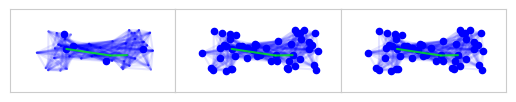

In [39]:
# building a PRM 
import matplotlib.animation as animation
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128


def animate_knn_prm(_prms, _sols, node_filters, node_batches=5, edge_batches=5, interval=50, animation_embed_limit=None):
    if animation_embed_limit is not None:
        import matplotlib
        matplotlib.rcParams['animation.embed_limit'] = animation_embed_limit
  
    fig, axs = plt.subplots(ncols=len(_prms))
    plt.subplots_adjust(wspace=0, hspace=0)
       
    for ax in axs:
        ax.set_xlim([-2.0, 2.0])
        ax.set_ylim([-1.0, 1.0])
        ax.set_aspect('equal', adjustable='box')
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])

    
    # the idea, make a little update function for each plot separately, and then compose them together
    vert_artists = []
    edge_artistss = []
    update_fns = []
    master_frames = []
    
    for probnum, (ax, _prm, _sol, node_filter) in enumerate(zip(axs, _prms, _sols, node_filters)):
        # first, generate the frame information.
        n_verts = _prm.num_vertices()
        k = _prm.k_neighbors
   
        sampling_frames = []
        for i in range(int(n_verts / node_batches) + 1):
            sampling_frames.append(
                (probnum, "sampling", 
                 (i + 1) * node_batches))
    
        # next, the edge connection frames
        edge_frames = []
        all_edges = np.array(list(_prm.prm_graph.iterEdges()))   
    
        for i in range(int(len(all_edges) / edge_batches) + 1):
            edges_to_add = all_edges[i * edge_batches : (i + 1) * edge_batches]
        
            # single node check to filter edges
            edge_frames.append(
                (probnum, "connecting", 
                edges_to_add[node_filter[edges_to_add[:, 0]]])
            )

    
        # then, the path render/turn graph red frame
        path_frames = []
        if len(_sol) > 0:
            for i in range(len(_sol) - 1):
                path_frames.append((probnum, "pathing", i))
    
        else:
            path_frames += [(probnum, "non-pathing", None)] * 10
    
        master_frames += sampling_frames + edge_frames + path_frames + [(probnum, 'hold', None)] * 20

    
        edge_artistss.append([])
        vert_artists.append(ax.scatter([], [], s=20, c='b'))
        
    
        def update(_f):
            _pn, _mode, _data = _f
        
            if _mode == 'sampling':
                # add additional filtering for the nodes within coll-free cspace
                vert_artists[_pn].set_offsets(_prm.prm_samples[:_data][node_filter[:_data]])
                return (vert_artists[_pn],)
        
            elif _mode == "connecting":    
                for _e in _data:
                    ux, uy = _prm.prm_samples[_e[0]]
                    vx, vy = _prm.prm_samples[_e[1]]
            
                    checking_edge_artist = axs[_pn].plot([ux, vx], [uy, vy], linestyle='-', c='b', alpha=0.1)[0]
                    edge_artistss[_pn].append(checking_edge_artist)
                
                return edge_artistss[_pn][:-len(_data)]
        
            elif _mode == "pathing":
       
                u, v = _sol[_data], _sol[_data + 1]
                edge_artistss[_pn].append(axs[_pn].plot([u[0], v[0]], [u[1], v[1]], c='lime', alpha=0.75)[0])
                
                return (edge_artistss[_pn][-1],)

            elif _mode == "non-pathing":
                # turn everything red.
                vert_artists[_pn].set_color('r')
                for e_art in edge_artistss[_pn]:
                    e_art.set_color('r')
                
                return (vert_artists[_pn], *edge_artists)
        
            else:
                return (vert_artists[_pn],)
            
        update_fns.append(update)
        
    def master_update_fn(_f):
        _pn, _, _ = _f
        return update_fns[_pn](_f)
    
    return animation.FuncAnimation(fig=fig, func=master_update_fn, frames=master_frames, interval=interval)
    
prm_env_2d = NarrowPassage(2, 0.25, seed=0)
prm = SimpleNearestNeighborRadiusPRM(32, prm_env_2d.is_motion_valid, prm_env_2d.sample_from_env, None, truncate_to_eff_rad=False, seed=1816595736)

prm.grow_to_n_samples(50)
prm.set_connection_radius(0.50)
_, path = prm.query_best_solution(start, goal)


ani = animate_knn_prm([prm]*3, [path]*3, [np.ones(prm.num_vertices(), dtype='bool')]*3)
# ani = animate_knn_prm(prm, [])
from IPython.display import HTML
HTML(ani.to_jshtml())

In [16]:
prm.num_vertices

<bound method SimplePRM.num_vertices of <nonasymptotic.prm.SimpleNearestNeighborRadiusPRM object at 0x7f9c86ee49d0>>